In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data = pd.read_csv('./data/boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
# 데이터 설명 (집값에 영향을 미치는 요소)
##crim : 범죄율
##zn : 25,000평방피트를 초과 거주지역 비율
##indus : 비소매상업지역 면적 비율
##chas : 찰스 강의 경계에 위치한 경우는 1 , 아니면 0
##nox : 일산화질소 농도
##rm : 주택당 방 수 
##age : 1940년 이전에 건축된 주택의 비율
##dis : 직업센터의 거리
##rad : 방사형 고속도로까지의 거리
##tax :재산세율
##ptratio : 학생/교사 비율
##b : 인구 중 흑인 비율
##lstat : 인구 중 하위 계츨 비율
##medv : 보스턴 506개 타운의 1978년 주택 가격 중앙값(단위:1,000달러)

# Feature Selection

In [64]:
# 가설1 : 범죄율이 높은 곳의 집 값은 낮을까?

#상관분석 전에 범주형 변수는 제거
del data['chas']
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


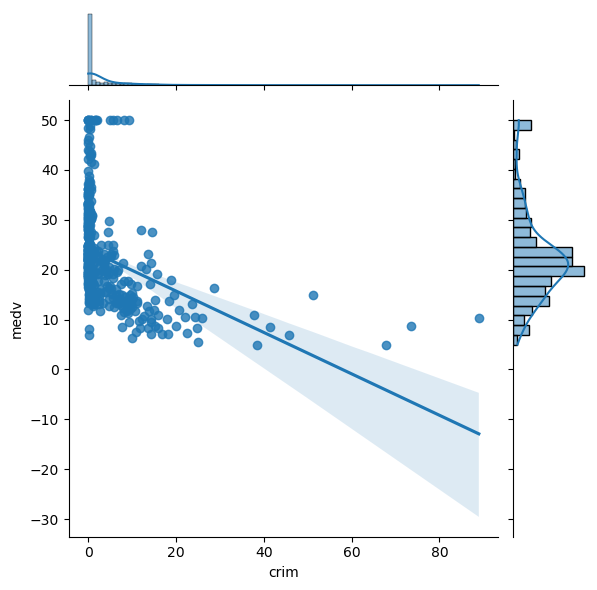

In [10]:
sns.jointplot(data=data, x='crim', y='medv', kind='reg')

In [11]:
# 공분산 x.cov(y) : 시리즈형의 x,y의 공분산
# 또는 df.cov() : 각 변수별로 공분산 계산
data['crim'].cov(data['medv'])

-30.71850796445818

In [12]:
# 상관계수 x.corr(y)
# df.corr()
data['crim'].corr(data['medv'])
## 0 ~ ±0.3 : 약한상관관계, ±0.3 ~ ±0.6 : 강한상관관계

-0.38830460858681154

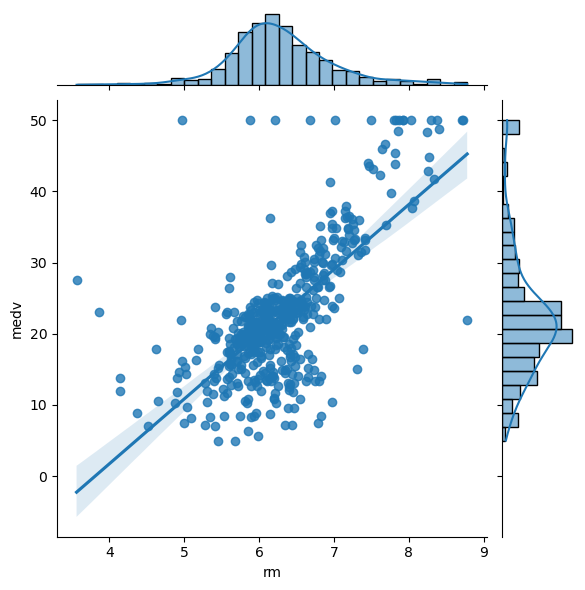

In [13]:
# 가설2 : 방의 개수가 많은 곳이 집 값이 비쌀까?
sns.jointplot(data=data, x='rm', y='medv', kind='reg')

In [14]:
data['rm'].corr(data['medv']) # 굉장히 높은 상관관계

0.6953599470715393

In [15]:
data['rm'].cov(data['medv']) # 공분산의 단점 : 공분산이 낮다고 상관관계가 낮은 것이 아님을 확인

4.493445879544476

In [17]:
data.corr()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
nox,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
ptratio,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


<AxesSubplot:>

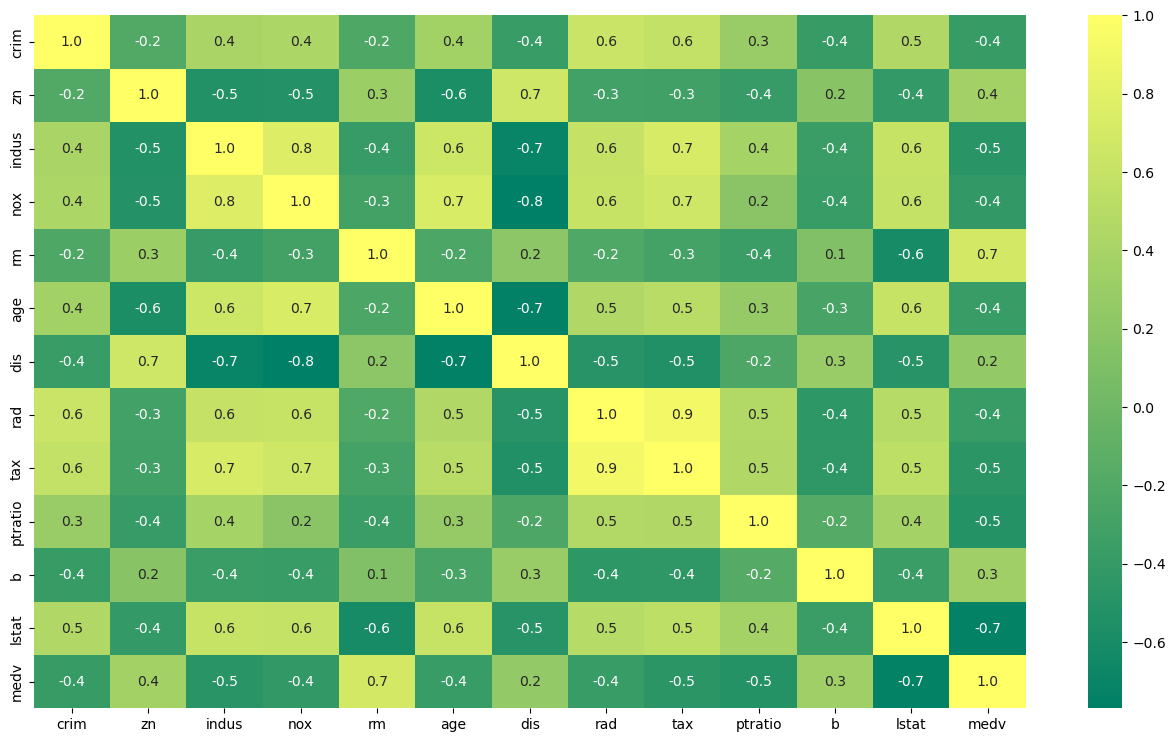

In [18]:
plt.figure(figsize = (16,9))
sns.heatmap(data.corr(), cmap='summer', annot=True, fmt='.1f')

# Feature Extraction

In [30]:
#변수들의 상관계수를 전부 확인하고 몇개의 변수를 몇개로 줄일것인지
corr_bar = []
for column in data.columns:
    print(f"{column}과 집값의 상관관계 : {data[column].corr(data['medv'])}")
    corr_bar.append(data[column].corr(data['medv']))

crim과 집값의 상관관계 : -0.38830460858681154
zn과 집값의 상관관계 : 0.3604453424505432
indus과 집값의 상관관계 : -0.4837251600283729
nox과 집값의 상관관계 : -0.42732077237328253
rm과 집값의 상관관계 : 0.6953599470715393
age과 집값의 상관관계 : -0.3769545650045963
dis과 집값의 상관관계 : 0.24992873408590388
rad과 집값의 상관관계 : -0.381626230639778
tax과 집값의 상관관계 : -0.4685359335677669
ptratio과 집값의 상관관계 : -0.5077866855375621
b과 집값의 상관관계 : 0.33346081965706637
lstat과 집값의 상관관계 : -0.7376627261740151
medv과 집값의 상관관계 : 1.0


/Users/minjeekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

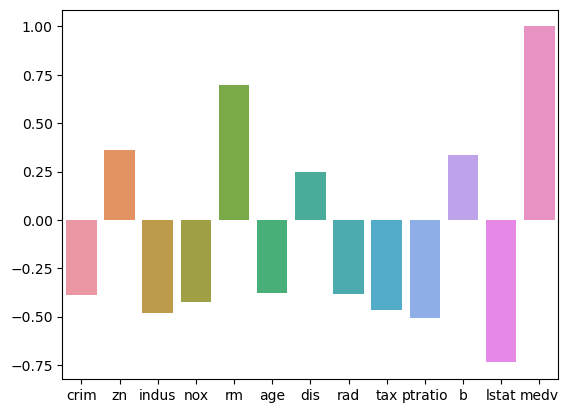

In [31]:
sns.barplot(data.columns, corr_bar)

In [33]:
# 수치형데이터 중 비교적 상관관계가 낮은 두개의 변수 선택
x = data[['dis','b']]

In [35]:
# PCA를 위한 라이브러리
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=1) #1개의 변수를 만들거임

In [37]:
pca.fit(x) #2개의 변수를 이용하여 학습시킴

PCA(n_components=1)

In [39]:
pca.components_ # 새로운변수에 담긴 각 변수의 분산 확인 : 'dis'보다 'b'의 특징만 99% 담음

array([[-0.00672682, -0.99997737]])

In [40]:
pca.explained_variance_ratio_ # 새로운변수 PC1이 설명하는 분산의 비율

array([0.9995135])

In [43]:
data['PC1'] = pca.transform(x) # 새로운 변수를 PC1이라는 칼럼에 추가
## PCA.fit_transform(x) : 학습과 변환을 동시에 진행
## PCA.fit(x) : 학습시킴
## PCA.transform(x) : 학습시킨 내용 PCA.fit(x)를 바탕으로 변환시킴
## 학습시키는 것과 변환시키는 것이 같으면 둘 중 무엇을 써도 상관없음 
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,PC1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-40.227042
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-40.232942
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-36.163035
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-37.970360
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-40.240309


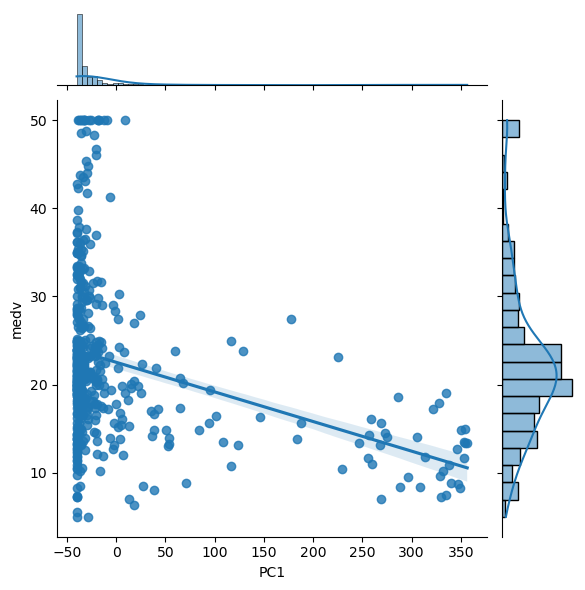

In [46]:
# 새로운변수와 집 값의 상관관계
sns.jointplot(data=data, x='PC1', y='medv', kind='reg')

In [47]:
data['PC1'].corr(data['medv'])

-0.33348451067418966

In [49]:
data['b'].corr(data['medv']) # 새로운변수와 원래변수 중 하나의 변수가 집 값과의 상관계수가 비슷 -> 새로운 변수를 만든의미가 없음..

0.33346081965706637

# 정규화 

In [50]:
from sklearn.preprocessing import StandardScaler #정규화에 필요한 라이브러리

In [52]:
scaler = StandardScaler() #정규화객체 

In [53]:
#x를 학습시킨 후 변형하여 정규화된 x로 만들기
scaler.fit(x)
scaler_x = scaler.transform(x)

# scaler_x = scaler.fit_transform(x)

In [55]:
scaler_x #변형된 데이터

array([[ 0.1402136 ,  0.44105193],
       [ 0.55715988,  0.44105193],
       [ 0.55715988,  0.39642699],
       ...,
       [-0.77368357,  0.44105193],
       [-0.66843684,  0.4032249 ],
       [-0.61324648,  0.44105193]])

In [56]:
pca = PCA(n_components=1)
pca.fit(scaler_x)
pca.components_

array([[-0.70710678, -0.70710678]])

In [58]:
pca.explained_variance_ratio_

array([0.64575584])

In [59]:
data['PC1']=pca.transform(scaler_x)
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,PC1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-0.411017
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-0.705842
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-0.674288
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-1.056346
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-1.073946


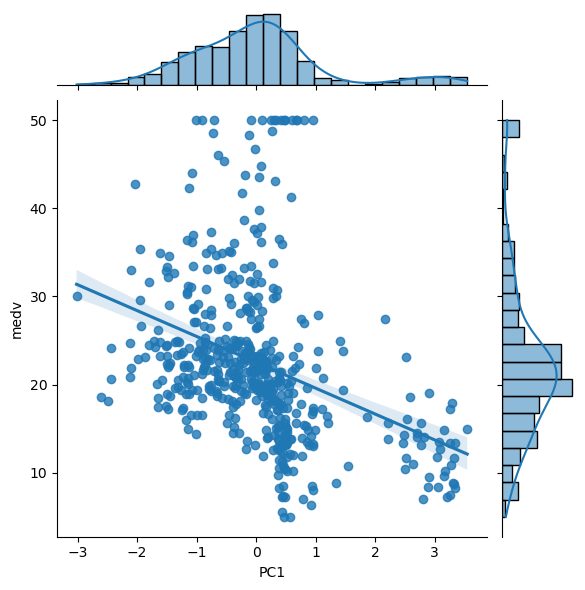

In [60]:
sns.jointplot(data=data, x='PC1', y='medv', kind='reg')

In [61]:
data['PC1'].corr(data['medv']) # 0.03높아짐!

-0.3629898510009019